<a href="https://colab.research.google.com/github/syarifahannisa1215/kecerdasan-buatan/blob/main/praktikum_kecerdasan_buatan_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install google-play-scraper
!pip install snscrape

from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from google.colab import files
uploaded = files.upload()


Saving ulasan_duolingo_1000.csv to ulasan_duolingo_1000.csv


In [16]:
import pandas as pd

df = pd.read_csv('ulasan_duolingo_1000.csv')

print(df.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')


In [18]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

df = pd.read_csv('ulasan_duolingo_1000.csv')
df = df[['content']].dropna()


def cleaningText(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['text_clean'] = df['content'].apply(cleaningText)


slangwords = {
    "gk": "tidak", "ga": "tidak", "nggak": "tidak", "tdk": "tidak",
    "bgt": "banget", "dr": "dari", "dgn": "dengan", "tp": "tapi",
    "udh": "sudah", "blm": "belum", "trs": "terus", "jg": "juga"
}

def fix_slangwords(text):
    return ' '.join([slangwords.get(word, word) for word in text.split()])

df['text_slang'] = df['text_clean'].apply(fix_slangwords)


def tokenizingText(text):
    return text.split()

df['text_tokens'] = df['text_slang'].apply(tokenizingText)


stop_words = set(stopwords.words('indonesian'))

def filteringText(words):
    return [word for word in words if word not in stop_words]

df['text_stopwords'] = df['text_tokens'].apply(filteringText)


def toSentence(words):
    return ' '.join(words)

df['text_final'] = df['text_stopwords'].apply(toSentence)


print(df[['content', 'text_final']].head())

                                             content  \
0                                         iklan mulu   
1  untuk fitur berbicara sangat buruk ketika di t...   
2  lama² ada unsur LGBT nya, gmn kalo itu di liat...   
3                          pinter tapi ada kesalahan   
4  Berkat Duolingo,aku jadi bisa belajar bahasa y...   

                                          text_final  
0                                         iklan mulu  
1                        fitur berbicara buruk ramai  
2  unsur lgbt nya gmn kalo liat anak bagus tolong...  
3                                   pinter kesalahan  
4  berkat duolingo belajar bahasa negeri indonesi...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmingText(text):
    return stemmer.stem(text)


df['text_stemmed'] = df['text_final'].apply(stemmingText)


print(df[['content', 'text_final', 'text_stemmed']].head())

                                             content  \
0                                         iklan mulu   
1  untuk fitur berbicara sangat buruk ketika di t...   
2  lama² ada unsur LGBT nya, gmn kalo itu di liat...   
3                          pinter tapi ada kesalahan   
4  Berkat Duolingo,aku jadi bisa belajar bahasa y...   

                                          text_final  \
0                                         iklan mulu   
1                        fitur berbicara buruk ramai   
2  unsur lgbt nya gmn kalo liat anak bagus tolong...   
3                                   pinter kesalahan   
4  berkat duolingo belajar bahasa negeri indonesi...   

                                        text_stemmed  
0                                         iklan mulu  
1                           fitur bicara buruk ramai  
2  unsur lgbt nya gmn kalo liat anak bagus tolong...  
3                                       pinter salah  
4  berkat duolingo ajar bahasa negeri indonesia b..

In [20]:
positive_words = {
    'bagus', 'baik', 'mantap', 'suka', 'cepat', 'puas', 'lancar', 'mudah',
    'keren', 'mantul', 'top', 'rekomendasi', 'senang', 'cocok', 'berhasil'
}
negative_words = {
    'buruk', 'jelek', 'lama', 'error', 'parah', 'lemot', 'kecewa', 'susah',
    'gagal', 'crash', 'keluar', 'hang', 'payah', 'benci', 'ribet'
}

# Fungsi analisis sentimen
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text.split():
        if word in positive_words:
            score += 1
        elif word in negative_words:
            score -= 1
    if score > 0:
        label = 'positif'
    elif score < 0:
        label = 'negatif'
    else:
        label = 'netral'
    return score, label

In [21]:
results = df['text_final'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]

In [22]:
print(df[['content', 'text_stemmed', 'polarity_score', 'polarity']].head)

<bound method NDFrame.head of                                                content  \
0                                           iklan mulu   
1    untuk fitur berbicara sangat buruk ketika di t...   
2    lama² ada unsur LGBT nya, gmn kalo itu di liat...   
3                            pinter tapi ada kesalahan   
4    Berkat Duolingo,aku jadi bisa belajar bahasa y...   
..                                                 ...   
995        this program is very good for study english   
996  bagus banget tapi aku malah milih jawabannya n...   
997                                            hebattt   
998  sudah baguss,,tapi msh ada iklan iklan yg meng...   
999                                        Tampa biaya   

                                          text_stemmed  polarity_score  \
0                                           iklan mulu               0   
1                             fitur bicara buruk ramai              -1   
2    unsur lgbt nya gmn kalo liat anak bagus tolong

In [23]:
x = df['text_stemmed']
y = df['polarity']

In [25]:
from sklearn.model_selection import train_test_split

#80/20
x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

#70/30
X_train_70, x_test_30, y_train_70, y_test_30 = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y)

#60/40
x_train_60, x_test_40, y_train_60, y_test_40 = train_test_split(
    x, y, test_size=0.4, random_state=42, stratify=y)

In [27]:
print("Distribusi label skema 80/20:\n", y_train_80.value_counts(normalize=True))
print("\nDistribusi label skema 70/30:\n", y_train_70.value_counts(normalize=True))
print("\nDistribusi label skema 60/40:\n", y_train_60.value_counts(normalize=True))


Distribusi label skema 80/20:
 polarity
netral     0.54375
positif    0.44875
negatif    0.00750
Name: proportion, dtype: float64

Distribusi label skema 70/30:
 polarity
netral     0.544286
positif    0.448571
negatif    0.007143
Name: proportion, dtype: float64

Distribusi label skema 60/40:
 polarity
netral     0.543333
positif    0.450000
negatif    0.006667
Name: proportion, dtype: float64


In [31]:
data_splits = {
    '80_20': (x_train_80, x_test_20, y_train_80, y_test_20),
    '70_30': (X_train_70, x_test_30, y_train_70, y_test_30),
    '60_40': (x_train_60, x_test_40, y_train_60, y_test_40)
}


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate(model_name, model, split_key, data_splits):
    X_train, X_test, y_train, y_test = data_splits[split_key]

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=5000)),
        ('clf', model)
    ])

    pipeline.fit(X_train, y_train)


    y_pred = pipeline.predict(X_test)

    print(f"Evaluasi untuk model {model_name} (skema {split_key}):\n")
    print(classification_report(y_test, y_pred))
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=['positif', 'netral', 'negatif'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['positif', 'netral', 'negatif'],yticklabels=['positif', 'netral', 'negatif'], cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name} ({split_key})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return pipeline


Evaluasi untuk model SVM (skema 80_20):

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         1
      netral       0.90      0.95      0.93       109
     positif       0.94      0.89      0.91        90

    accuracy                           0.92       200
   macro avg       0.62      0.61      0.61       200
weighted avg       0.92      0.92      0.92       200

Akurasi: 0.9200


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


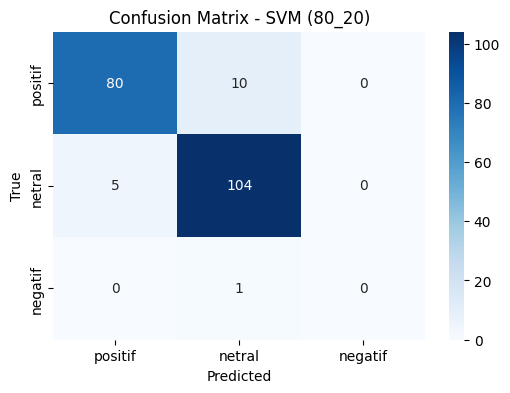

Evaluasi untuk model Random Forest (skema 70_30):

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         2
      netral       0.90      0.98      0.94       163
     positif       0.98      0.88      0.93       135

    accuracy                           0.93       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.93      0.93      0.93       300

Akurasi: 0.9300


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


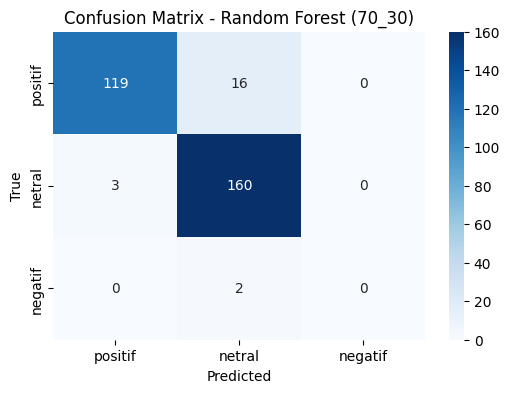

Evaluasi untuk model SVM 60/40 (skema 60_40):

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         3
      netral       0.89      0.96      0.92       218
     positif       0.95      0.87      0.90       179

    accuracy                           0.91       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.91      0.91      0.91       400

Akurasi: 0.9100


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


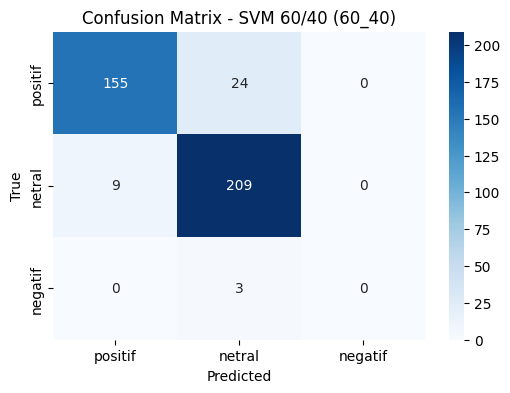

In [37]:
svm_model_80 = train_and_evaluate("SVM", SVC(kernel='linear'), '80_20', data_splits)

rf_model_70 = train_and_evaluate("Random Forest", RandomForestClassifier(n_estimators=100), '70_30', data_splits)

svm_model_60 = train_and_evaluate("SVM 60/40", SVC(kernel='linear'), '60_40', data_splits)
